In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-gpu

In [ ]:
!nividia-smi

In [3]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import  AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
dataset=('/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset')
imagePaths=list(paths.list_images(dataset))


In [5]:
imagePaths

['/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/163-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/109-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/augmented_image_151.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/313-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/399-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/101-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/233-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/81-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/23-with-mask.jpg',
 '/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/Dataset/with_mask/augmen

In [6]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i, target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [7]:
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

In [8]:
image

array([[[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       ...,

       [[ 0.77254903,  0.77254903,  0.75686276],
        [-0

In [9]:
data

[array([[[ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  1.        ,  0.9529412 ],
         [ 0.99215686,  1.        ,  0.92156863],
         ...,
         [ 1.        ,  0.99215686,  1.        ],
         [ 1.        ,  0.99215686,  1.        ],
         [ 1.        ,  0.99215686,  1.        ]],
 
        [[ 0.99215686,  0.99215686,  0.99215686],
         [ 1.        ,  0.99215686,  0.9529412 ],
         [ 1.        ,  1.        ,  0.9372549 ],
         ...,
         [ 1.        ,  1.        ,  0.92941177],
         [ 1.        ,  1.        ,  0.92941177],
         [ 1.        ,  1.        ,  0.92941177]],
 
        [[ 1.        ,  0.99215686,  0.9764706 ],
         [ 1.        ,  0.99215686,  0.9607843 ],
         [ 1.        ,  0.99215686,  0.9607843 ],
         ...,
         [ 1.        ,  1.        ,  0.94509804],
         [ 1.        ,  1.        ,  0.94509804],
         [ 1.        ,  1.        ,  0.94509804]],
 
        ...,
 
        [[ 0.99215686,  0.9843137 

In [10]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [11]:
data.shape

(1391, 224, 224, 3)

In [12]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

In [13]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [14]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [15]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [16]:
train_X

array([[[[ 0.8980392 ,  0.84313726,  0.69411767],
         [ 0.8980392 ,  0.84313726,  0.69411767],
         [ 0.8980392 ,  0.84313726,  0.69411767],
         ...,
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ],
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ],
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ]],

        [[ 0.8901961 ,  0.8509804 ,  0.6784314 ],
         [ 0.88235295,  0.84313726,  0.6862745 ],
         [ 0.88235295,  0.84313726,  0.6862745 ],
         ...,
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ],
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ],
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ]],

        [[ 0.88235295,  0.8666667 ,  0.6862745 ],
         [ 0.85882354,  0.84313726,  0.6627451 ],
         [ 0.85882354,  0.84313726,  0.6784314 ],
         ...,
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ],
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ],
         [ 0.9843137 ,  0.9843137 ,  0.9843137 ]],

        ...,

        [[ 0.07450986, -0.42745095, -0

In [17]:
train_Y.size

2224

In [18]:
train_X.size

167387136

In [19]:
train_X.shape

(1112, 224, 224, 3)

In [20]:
train_Y.shape

(1112, 2)

In [21]:
test_X

array([[[[ 0.84313726,  0.8980392 ,  1.        ],
         [ 0.5529412 ,  0.56078434,  0.7254902 ],
         [ 0.67058825,  0.654902  ,  0.827451  ],
         ...,
         [ 0.9843137 ,  0.8352941 ,  0.9843137 ],
         [ 0.79607844,  0.654902  ,  0.78039217],
         [ 0.85882354,  0.73333335,  0.8352941 ]],

        [[ 0.7882353 ,  0.827451  ,  0.9843137 ],
         [ 0.77254903,  0.78039217,  0.94509804],
         [ 0.92156863,  0.8901961 ,  1.        ],
         ...,
         [ 0.60784316,  0.6862745 ,  0.75686276],
         [ 0.8666667 ,  0.9529412 ,  1.        ],
         [ 0.7882353 ,  0.8980392 ,  0.92156863]],

        [[ 0.92941177,  0.94509804,  1.        ],
         [ 0.8117647 ,  0.79607844,  0.96862745],
         [ 0.73333335,  0.7019608 ,  0.8980392 ],
         ...,
         [ 0.70980394,  0.8117647 ,  0.8745098 ],
         [ 0.9137255 ,  1.        ,  1.        ],
         [ 0.827451  ,  0.94509804,  0.9843137 ]],

        ...,

        [[-0.3098039 , -0.8352941 , -0

In [22]:
test_X.shape

(279, 224, 224, 3)

In [23]:
test_Y.shape

(279, 2)

In [24]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [25]:
aug

In [26]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [27]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [28]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [29]:
for layer in baseModel.layers:
    layer.trainable=False

In [30]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [31]:
    learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


Epoch 1/20
92/92 [==============================] - 13s 146ms/step - loss: 0.1944 - accuracy: 0.9173 - val_loss: 0.0157 - val_accuracy: 0.9928
Epoch 2/20
92/92 [==============================] - 12s 130ms/step - loss: 0.0803 - accuracy: 0.9700
Epoch 3/20
92/92 [==============================] - 12s 130ms/step - loss: 0.0481 - accuracy: 0.9827
Epoch 4/20
92/92 [==============================] - 12s 130ms/step - loss: 0.0486 - accuracy: 0.9800
Epoch 5/20
92/92 [==============================] - 12s 131ms/step - loss: 0.0400 - accuracy: 0.9873
Epoch 6/20
92/92 [==============================] - 12s 131ms/step - loss: 0.0455 - accuracy: 0.9827
Epoch 7/20
92/92 [==============================] - 12s 131ms/step - loss: 0.0459 - accuracy: 0.9827
Epoch 8/20
92/92 [==============================] - 12s 131ms/step - loss: 0.0571 - accuracy: 0.9783
Epoch 9/20
92/92 [==============================] - 12s 132ms/step - loss: 0.0501 - accuracy: 0.9855
Epoch 10/20
92/92 [==============================

In [32]:
model.save('mobilenet_v2.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mobilenet_v2.model/assets


In [42]:
model.save('mobilenet_v1.h5')

In [35]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       140
without_mask       1.00      1.00      1.00       139

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [34]:
from google.colab import files
files.download('/content/mobilenet_v2.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

In [37]:
prototxtPath=os.path.sep.join(['/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/','deploy.prototxt'])
weightsPath=os.path.sep.join(['/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/','res10_300x300_ssd_iter_140000.caffemodel'])

In [38]:
net=cv2.dnn.readNet(prototxtPath,weightsPath)

In [43]:
model=load_model('/content/mobilenet_v1.h5')

In [113]:
image=cv2.imread('/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/example_01.png')

In [114]:
image

array([[[186, 183, 145],
        [186, 184, 144],
        [186, 184, 144],
        ...,
        [223, 220, 215],
        [223, 220, 215],
        [223, 220, 215]],

       [[184, 183, 145],
        [184, 183, 145],
        [184, 183, 145],
        ...,
        [223, 220, 215],
        [223, 220, 215],
        [223, 220, 215]],

       [[182, 181, 146],
        [182, 181, 146],
        [183, 182, 144],
        ...,
        [223, 220, 215],
        [223, 220, 215],
        [223, 220, 215]],

       ...,

       [[ 90,  87,  77],
        [ 90,  87,  77],
        [ 91,  88,  78],
        ...,
        [106, 102,  96],
        [106, 102,  96],
        [106, 102,  96]],

       [[ 90,  87,  77],
        [ 91,  88,  78],
        [ 91,  88,  78],
        ...,
        [105, 101,  95],
        [105, 101,  95],
        [105, 101,  95]],

       [[ 90,  87,  77],
        [ 91,  88,  78],
        [ 91,  88,  78],
        ...,
        [104, 100,  94],
        [104, 100,  94],
        [104, 100,  94]]

In [115]:
(h,w)=image.shape[:2]

In [116]:
(h,w)

(500, 600)

In [117]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))

In [118]:
blob

array([[[[ 81.,  81.,  76., ..., 119., 119., 119.],
         [ 78.,  79.,  81., ..., 119., 119., 119.],
         [ 68.,  70.,  75., ..., 118., 118., 118.],
         ...,
         [-13., -13., -11., ...,  -1.,   1.,   2.],
         [-14., -13., -15., ...,   0.,   2.,   2.],
         [-14., -13., -14., ...,  -2.,   0.,   0.]],

        [[  6.,   7.,   1., ...,  43.,  43.,  43.],
         [  4.,   5.,   6., ...,  43.,  43.,  43.],
         [ -5.,  -2.,   0., ...,  42.,  42.,  42.],
         ...,
         [-89., -89., -86., ..., -76., -76., -74.],
         [-90., -89., -90., ..., -74., -75., -75.],
         [-90., -89., -90., ..., -76., -77., -77.]],

        [[ 22.,  21.,  13., ...,  92.,  92.,  92.],
         [ 23.,  21.,  20., ...,  92.,  92.,  92.],
         [ 18.,  19.,  16., ...,  91.,  91.,  91.],
         ...,
         [-45., -45., -42., ..., -33., -28., -26.],
         [-46., -45., -46., ..., -33., -27., -27.],
         [-46., -45., -45., ..., -35., -29., -29.]]]], dtype=float32)

In [119]:
blob.shape

(1, 3, 300, 300)

In [120]:
net.setInput(blob)
detections=net.forward()

In [121]:
detections

array([[[[0.        , 1.        , 0.9984427 , ..., 0.12488028,
          0.6709176 , 0.3542412 ],
         [0.        , 1.        , 0.12920396, ..., 3.9990287 ,
          4.8382664 , 4.984081  ],
         [0.        , 1.        , 0.12446588, ..., 3.994579  ,
          0.85450625, 4.978922  ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

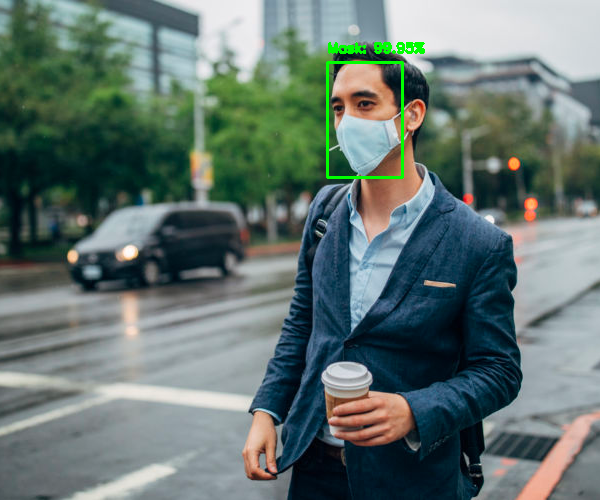

In [122]:
from google.colab.patches import cv2_imshow
#loop over the detections
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    
    
    if confidence>0.5:
        #we need the X,Y coordinates
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        
        #ensure the bounding boxes fall within the dimensions of the frame
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
        
        #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(224,224))
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
        
        
cv2.startWindowThread()       
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [108]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
from imutils.video import VideoStream
import imutils

In [106]:
def detect_and_predict_mask(frame,faceNet,maskNet):
    #grab the dimensions of the frame and then construct a blob
    (h,w)=frame.shape[:2]
    #shrink = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    #cv2.imshow('Shrink', shrink)
    try:
      frame.shape
      print("checked for shape".format(frame.shape))
    except AttributeError:
      print("shape not found")
    #code to move to next frame
    blob=cv2.dnn.blobFromImage(frame,1.0,(300,300),(104.0,177.0,123.0))
    
    faceNet.setInput(blob)
    detections=faceNet.forward()
    
    #initialize our list of faces, their corresponding locations and list of predictions
    
    faces=[]
    locs=[]
    preds=[]
    
    
    for i in range(0,detections.shape[2]):
        confidence=detections[0,0,i,2]
    
    
        if confidence>0.5:
        #we need the X,Y coordinates
            box=detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startX,startY,endX,endY)=box.astype('int')
        
            #ensure the bounding boxes fall within the dimensions of the frame
            (startX,startY)=(max(0,startX),max(0,startY))
            (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
            #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
            face=frame[startY:endY, startX:endX]
            face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
            face=cv2.resize(face,(224,224))
            face=img_to_array(face)
            face=preprocess_input(face)
        
            faces.append(face)
            locs.append((startX,startY,endX,endY))
        
        #only make a predictions if atleast one face was detected
        if len(faces)>0:
            faces=np.array(faces,dtype='float32')
            preds=maskNet.predict(faces,batch_size=12)
        
        return (locs,preds)

In [109]:
prototxtPath=os.path.sep.join(['/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/','deploy.prototxt'])
weightsPath=os.path.sep.join(['/content/drive/My Drive/Colab Notebooks/FaceMask Recognition/','res10_300x300_ssd_iter_140000.caffemodel'])

In [110]:
faceNet=cv2.dnn.readNet(prototxtPath,weightsPath)

In [111]:
maskNet=load_model('/content/mobilenet_v1.h5')

In [112]:
vs=VideoStream(src=0).start()

while True:
    #grab the frame from the threaded video stream and resize it
    #to have a maximum width of 400 pixels
    frame=vs.read()
    frame=imutils.resize(frame,width=400,height=None,inter=3)
    
    #detect faces in the frame and preict if they are waring masks or not
    (locs,preds)=detect_and_predict_mask(frame,faceNet,maskNet)
    
    #loop over the detected face locations and their corrosponding loactions
    
    for (box,pred) in zip(locs,preds):
        (startX,startY,endX,endY)=box
        (mask,withoutMask)=pred
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        
        #display the label and bounding boxes
        cv2.putText(frame,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        
        cv2.rectangle(frame,(startX,startY),(endX,endY),color,2)
        
    #show the output frame
    cv2.imshow("Frame",frame)
    key=cv2.waitKey(1) & 0xFF
    
    if key==ord('q'):
        break
        
cv2.destroyAllWindows()
vs.stop()
        
        
    

AttributeError: ignored